# Robustness Analysis

Loading the appropriate Python and COBRApy packages

In [1]:
import cobra.test
import numpy as np
import pandas as pd
from cobrapy_bigg_client import client
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

### Set autotropic conditions

In [3]:
model_orig = client.download_model('iJN678', save=False) # Loading the model to the simulation
model = model_orig.copy()
model.solver = "glpk"

# Set Biomass Function
model.objective = 'BIOMASS_Ec_SynAuto'
model.reactions.BIOMASS_Ec_SynHetero.bounds = [-0,0]
model.reactions.BIOMASS_Ec_SynMixo.bounds = [-0,0]

# Autotropic Conditions
model.reactions.EX_photon_e.bounds = [-100,0]
model.reactions.EX_glc__D_e.bounds = [-0,0]
model.reactions.EX_hco3_e.bounds = [-3.7,0]
#model.reactions.EX_co2_e.bounds = [-3.7,0] # Enable for using CO2 as the carbon source

# Constraining cytochrome c6-dependent reactions.
model.reactions.CBFC2.bounds = [-0,0]
model.reactions.PSI_2.bounds = [-0,0]
model.reactions.CYO1b_syn.bounds = [-0,0]
model.reactions.CYO1b2_syn.bounds = [-0,0] # test

# Constraining NADH-dependent reactions.
model.reactions.NDH1_2u.bounds = [-0,0]
model.reactions.NDH1_2p.bounds = [-0,0]

# Constraining peryplasmatic reactions.
model.reactions.NDH1_1p.bounds = [-0,0]
model.reactions.CYO1b2pp_syn.bounds = [-0,0]
model.reactions.CYO1bpp_syn.bounds = [-0,0]
model.reactions.CBFCpp.bounds = [-0,0]
model.reactions.CYTBDpp_1.bounds = [-0,0]

# Assume irreversibility of ferredoxin NADPH reductase under autotrophic conditions.
model.reactions.FNOR.lower_bound = 0

#Assume no excretion of CO2 under autotrophic conditions
model.reactions.EX_co2_e.upper_bound = 0

# Removing AEF pathways
model.reactions.NDH1_1u.bounds = [-0,0]
model.reactions.NDH2_syn.bounds = [-0,0]
model.reactions.NDH1_3u.bounds = [-0,0] # Enable if CO2 is the carbon source
model.reactions.FQR.bounds = [-0,0]
model.reactions.CYO1b_syn.bounds = [-0,0]
model.reactions.CYTBDu.bounds = [-0,0]
model.reactions.H2ASE_syn.bounds = [-0,0]
model.reactions.MEHLER.bounds = [-0,0]

# Limit photorespiratory reactions
model.reactions.RBPC.upper_bound = 4.30987
model.reactions.RBCh.upper_bound = 0.2045310

model.reactions.SUCDu_syn.bounds = [-0,0]
model.reactions.PSI_2.bounds = [-0,0]
model.reactions.CBFC2.bounds = [-0,0]

# Save autotropic LEF model for later use
model_LEF = model.copy()

# Calculate FBA
#solution = model.optimize()
#solution = loopless_solution(model)

Read LP format model from file C:\Users\hinton\AppData\Local\Temp\tmp0a5va4h4.lp
Reading time = 0.01 seconds
: 795 rows, 1726 columns, 8316 nonzeros


## Robustness Analysis Using "envelope" COBRApy Function¶

Robustness analysis for oxygen

In [4]:
from cobra.flux_analysis import production_envelope

model4 = model_orig.copy()
RA_o2 = production_envelope(
    model, ["EX_o2_e"], objective="BIOMASS_Ec_SynAuto", carbon_sources="EX_hco3_e", points=100)
RA_o2.round(5)

Read LP format model from file C:\Users\hinton\AppData\Local\Temp\tmpkjbr40ct.lp
Reading time = 0.01 seconds
: 795 rows, 1726 columns, 8316 nonzeros


,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_o2_e
0,EX_hco3_e,0.0,NaN,NaN,0.00000,NaN,NaN,0.00000
1,EX_hco3_e,0.0,0.0,NaN,0.00064,8.69828,NaN,0.06914
2,EX_hco3_e,0.0,0.0,NaN,0.00128,8.69828,NaN,0.13828
3,EX_hco3_e,0.0,0.0,NaN,0.00192,8.69828,NaN,0.20742
4,EX_hco3_e,0.0,0.0,NaN,0.00256,8.69828,NaN,0.27657
5,EX_hco3_e,0.0,0.0,NaN,0.00320,8.69828,NaN,0.34571
6,EX_hco3_e,0.0,0.0,NaN,0.00384,8.69828,NaN,0.41485
7,EX_hco3_e,0.0,0.0,NaN,0.00448,8.69828,NaN,0.48399
8,EX_hco3_e,0.0,0.0,NaN,0.00512,8.69828,NaN,0.55313
9,EX_hco3_e,0.0,0.0,NaN,0.00576,8.69828,NaN,0.62227


<AxesSubplot:xlabel='EX_o2_e'>

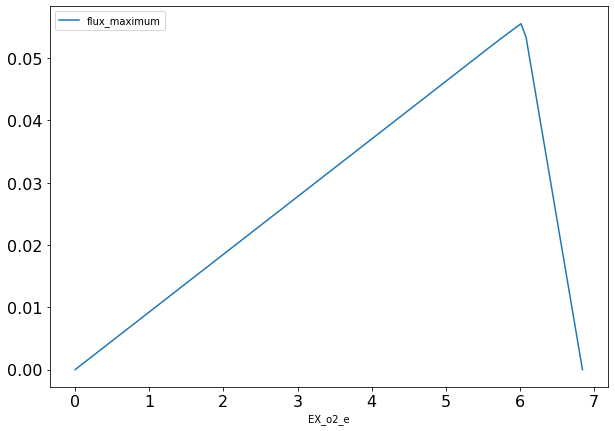

In [6]:
RA_o2.plot(kind='line', x='EX_o2_e', y='flux_maximum',figsize=(10,7),fontsize=16)

Robustness analysis for glucose

In [ ]:
model4.reactions.EX_o2_e.lower_bound = -20
model4.reactions.EX_glc__D_e.lower_bound = -30
RA_glc = production_envelope(
    model4, ["EX_glc__D_e"], objective="BIOMASS_Ecoli_core_w_GAM", carbon_sources="EX_glc__D_e", points=100)
RA_glc.round(5)

In [ ]:
RA_glc.plot(kind='line', x='EX_glc__D_e', y='flux_maximum',figsize=(10,7))